<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ-и-подготовка-данных" data-toc-modified-id="Анализ-и-подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Декомпозиция" data-toc-modified-id="Декомпозиция-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Декомпозиция</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#DecisionTree-регрессия" data-toc-modified-id="DecisionTree-регрессия-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>DecisionTree регрессия</a></span></li><li><span><a href="#CatBoost-регрессия" data-toc-modified-id="CatBoost-регрессия-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost регрессия</a></span></li><li><span><a href="#LightGBMRegressor" data-toc-modified-id="LightGBMRegressor-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>LightGBMRegressor</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-моделей" data-toc-modified-id="Тестирование-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование моделей</a></span><ul class="toc-item"><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#DecisionTree-регрессия" data-toc-modified-id="DecisionTree-регрессия-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>DecisionTree регрессия</a></span></li><li><span><a href="#CatBoost-регрессия" data-toc-modified-id="CatBoost-регрессия-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>CatBoost регрессия</a></span></li><li><span><a href="#LGBM-регрессия" data-toc-modified-id="LGBM-регрессия-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>LGBM регрессия</a></span></li></ul></li></ul></div>

<div style="border:2px solid Black; padding:20px;">

# Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Построем модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.
</div>


# План работы над проектом
- Загрузить данные и выполнить их ресемплирование по одному часу.
- Проанализировать данные.
- Обучить разные модели с различными гиперпараметрами.
- Сделать тестовую выборку размером 10% от исходных данных.
- Проверить данные на тестовой выборке и сделать выводы.

# Описание данных
Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

## Подготовка

In [ ]:
pip install statsmodels


In [ ]:
pip install lightgbm

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

import pathlib

from pathlib import Path

import matplotlib.pyplot as plt


from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

import warnings

from sklearn.metrics import mean_squared_error

from catboost import Pool, CatBoostRegressor, cv

from lightgbm import LGBMRegressor

warnings.filterwarnings('ignore')

In [ ]:
#Загрузим данные и осортируем их в порядке возратсания
taxi = pd.read_csv('datasets/taxi.csv', index_col=[0], parse_dates=[0])
taxi.sort_index(inplace=True)
taxi.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [ ]:
display(taxi.head())
print('-----------------------------------------------------------------')

display(taxi.tail())
print('-----------------------------------------------------------------')

display(taxi.info())
print('-----------------------------------------------------------------')

print('Кол-во пропусков:')
display(taxi.isna().sum())

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


-----------------------------------------------------------------


,num_orders
datetime,
2018-08-31 23:10:00,32
2018-08-31 23:20:00,24
2018-08-31 23:30:00,27
2018-08-31 23:40:00,39
2018-08-31 23:50:00,53


-----------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


None

-----------------------------------------------------------------
Кол-во пропусков:


num_orders    0
dtype: int64

In [ ]:
#ресемплирую данные по одному часу:
taxi.sort_index(inplace=True)
taxi = taxi.resample('1H').sum()

# Вывод по п.1. Обзор данных:
- Данные с 1 марта 2018 по 31 августа 2018, всего 26 496 записей, достаточно для анализа
- Пропусков нет, тип данных в столбце num_orders менять не надо
- Дубликаты искать бессмысленно, так как кол-во заказов из-за сезонности и времени суток может повторяться
- Данные ресемплированы по 1 часу по условию задачи

## Анализ и подготовка данных

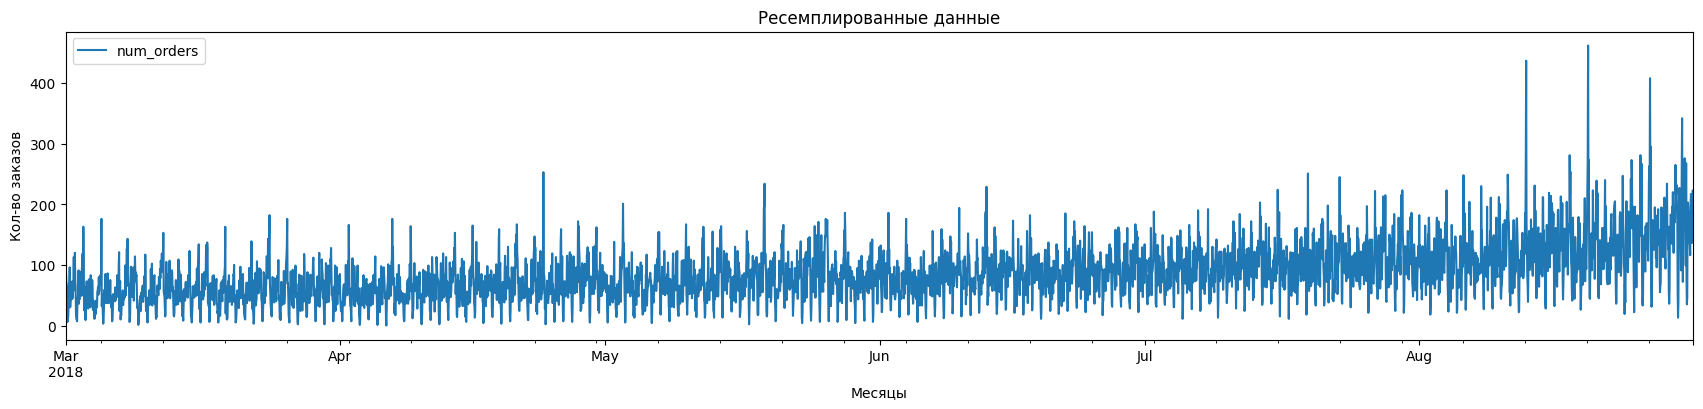

In [ ]:
#вывожу график ресемплированных данных:
figsize = (21,4)
taxi.plot(figsize=figsize)
plt.title('Ресемплированные данные')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

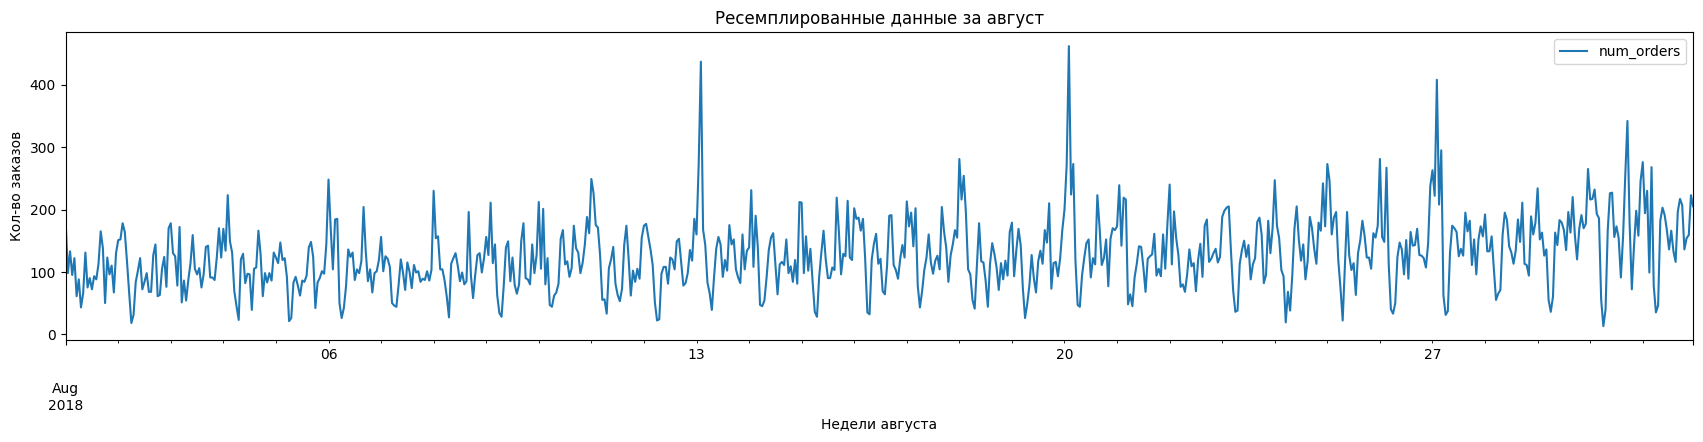

In [ ]:
#вывожу график за август:
taxi_aug = taxi['2018-08-01':]
taxi_aug.plot(figsize=figsize)
plt.title('Ресемплированные данные за август')
plt.xlabel('Недели августа')
plt.ylabel('Кол-во заказов')
plt.show()

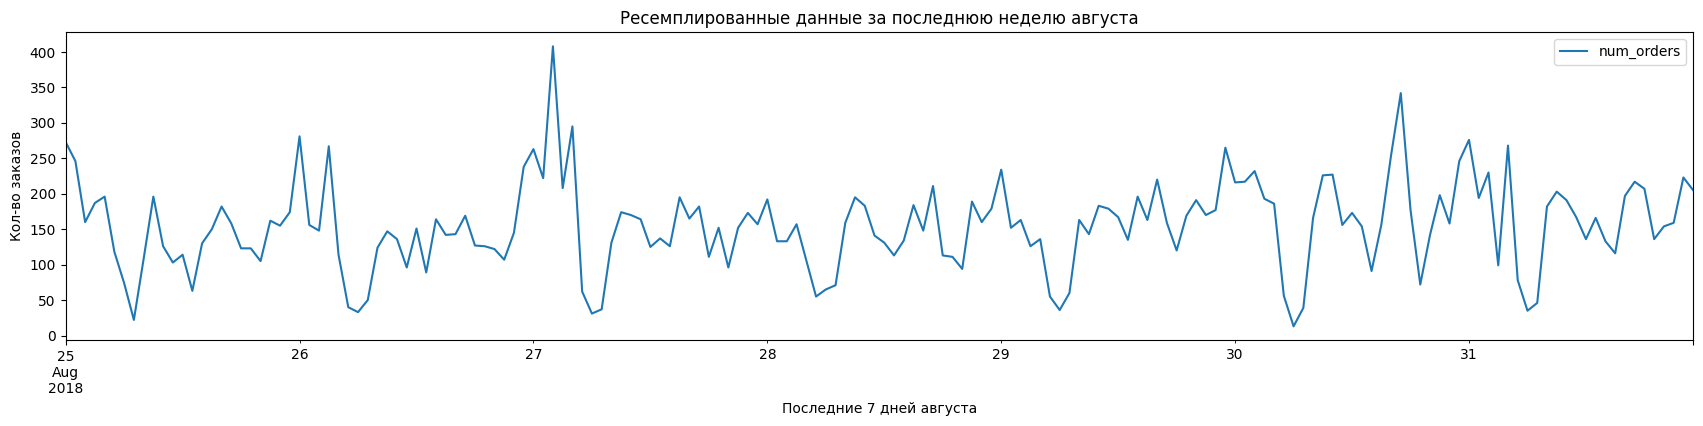

In [ ]:
#вывожу график за последнюю неделю августа:
taxi_aug_7days = taxi['2018-08-25':]
taxi_aug_7days.plot(figsize=figsize)
plt.title('Ресемплированные данные за последнюю неделю августа')
plt.xlabel('Последние 7 дней августа')
plt.ylabel('Кол-во заказов')
plt.show()

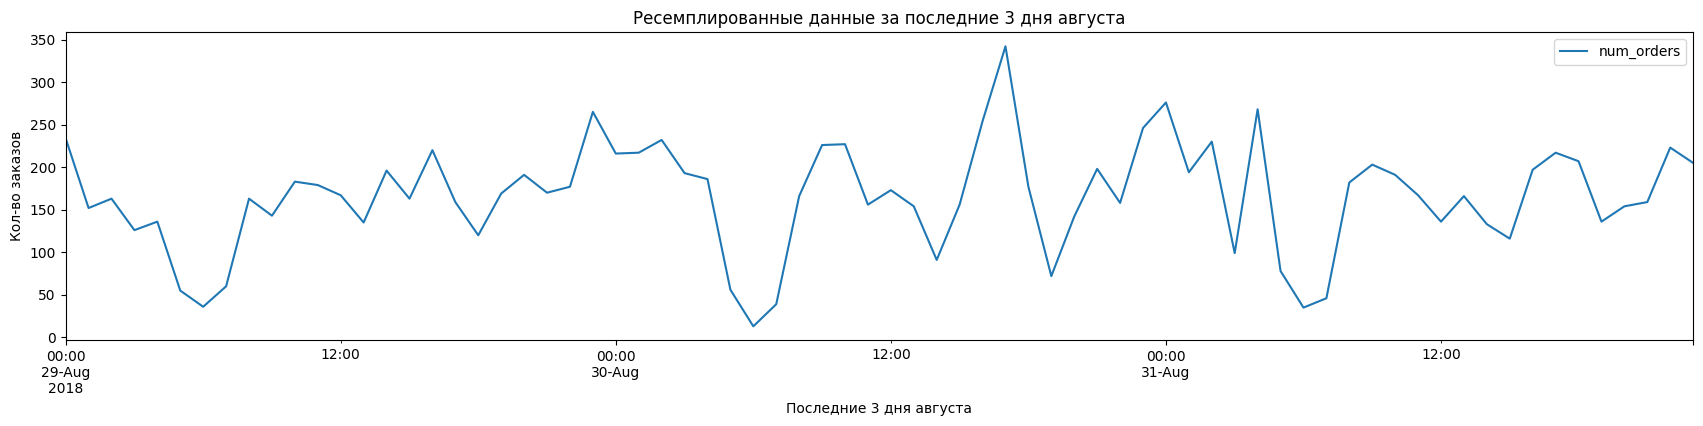

In [ ]:
#вывожу график за последние 3 дня августа:
taxi_aug_3days = taxi['2018-08-29':]
taxi_aug_3days.plot(figsize=figsize)
plt.title('Ресемплированные данные за последние 3 дня августа')
plt.xlabel('Последние 3 дня августа')
plt.ylabel('Кол-во заказов')
plt.show()

**Стационарные временные ряды (англ. stationary time series)** — это ряды, у которых среднее и стандартное отклонение не меняются. Когда среднее и стандартное отклонение первого ряда меняется медленнее второго, то первый ряд «более стационарный», чем второй.

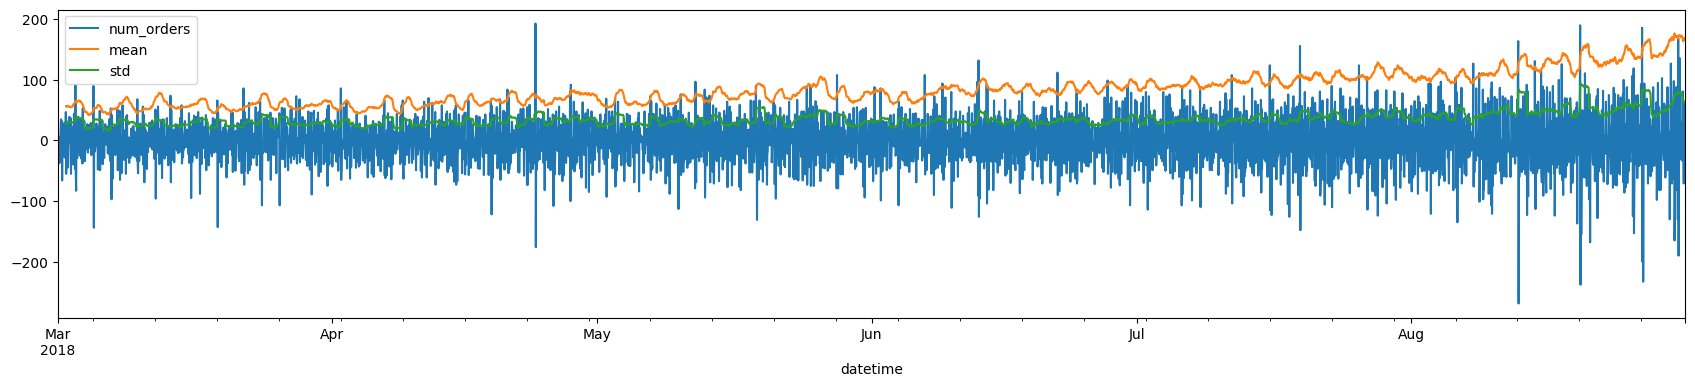

In [ ]:
taxi_shift = taxi - taxi.shift()
taxi_shift['mean'] = taxi['num_orders'].rolling(24).mean()
taxi_shift['std'] = taxi['num_orders'].rolling(24).std()
taxi_shift.plot(figsize=figsize);

In [ ]:
# код ревьювера
from statsmodels.tsa.stattools import adfuller

taxi = pd.read_csv("datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()

ts = taxi['num_orders']
st_test = adfuller(ts, regression='ctt')

print('Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный')
if st_test[1] < 0.05:
    print('Наш ряд стационарный')
else:
    print('Ряд нестационарный')




Если значение с индексом 1 меньше P-Value, заданное нами (обычно берут 0.05), то ряд стационарный
Наш ряд стационарный


### Скользящее среднее

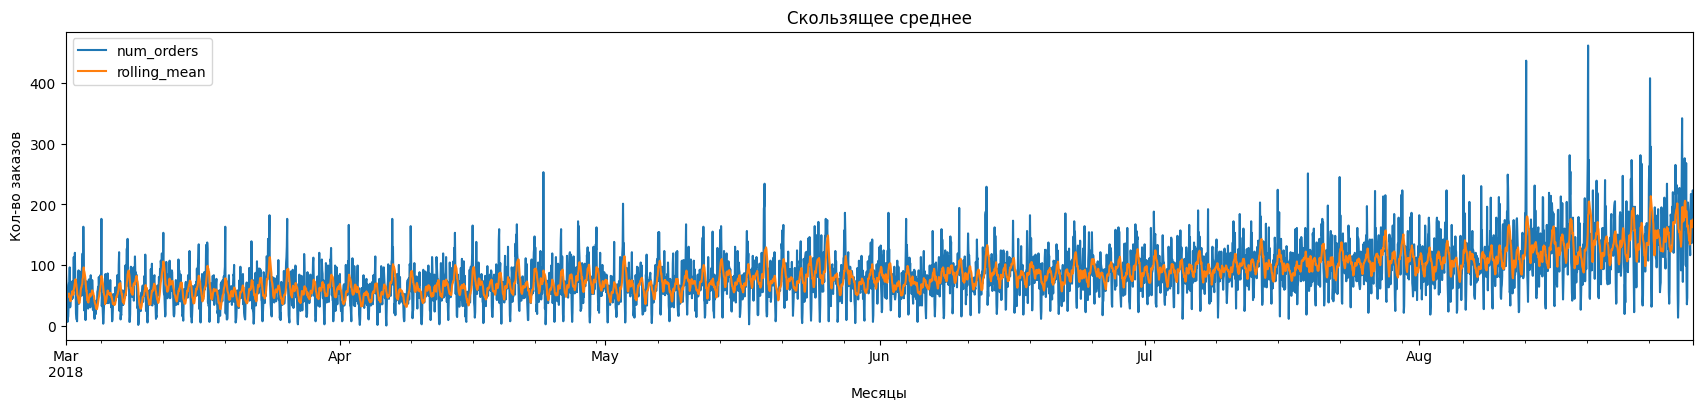

In [ ]:
taxi['rolling_mean'] = taxi.rolling(10).mean()
taxi.plot(figsize=figsize)
plt.title('Скользящее среднее')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

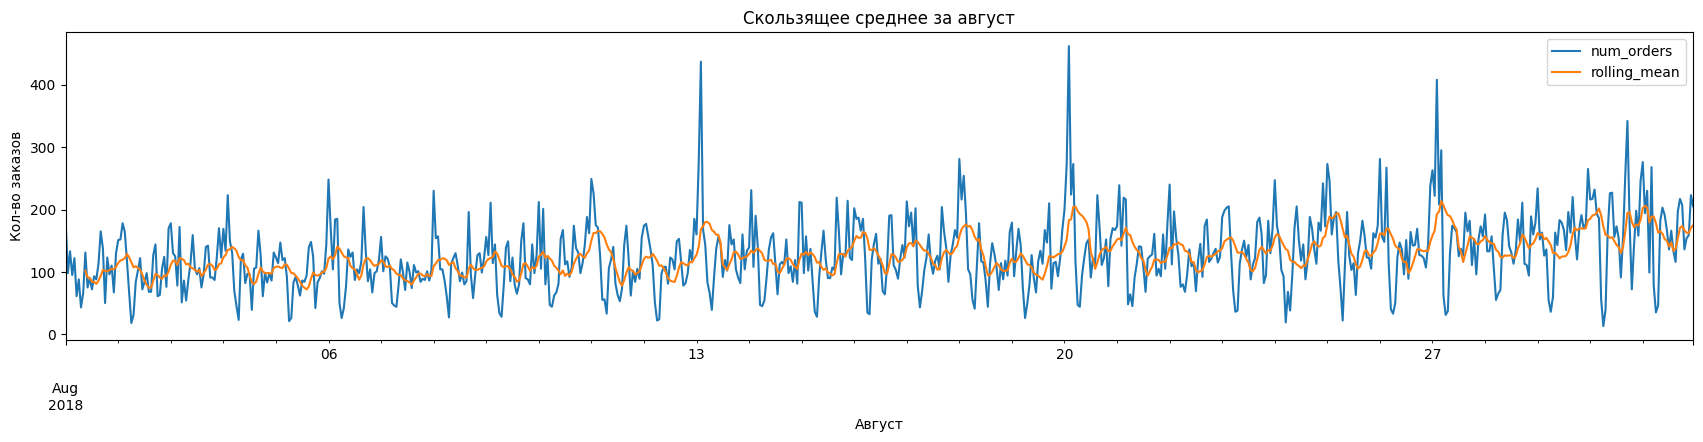

In [ ]:
taxi_aug['rolling_mean'] = taxi_aug.rolling(10).mean()
taxi_aug.plot(figsize=figsize)
plt.title('Скользящее среднее за август')
plt.xlabel('Август')
plt.ylabel('Кол-во заказов')
plt.show()

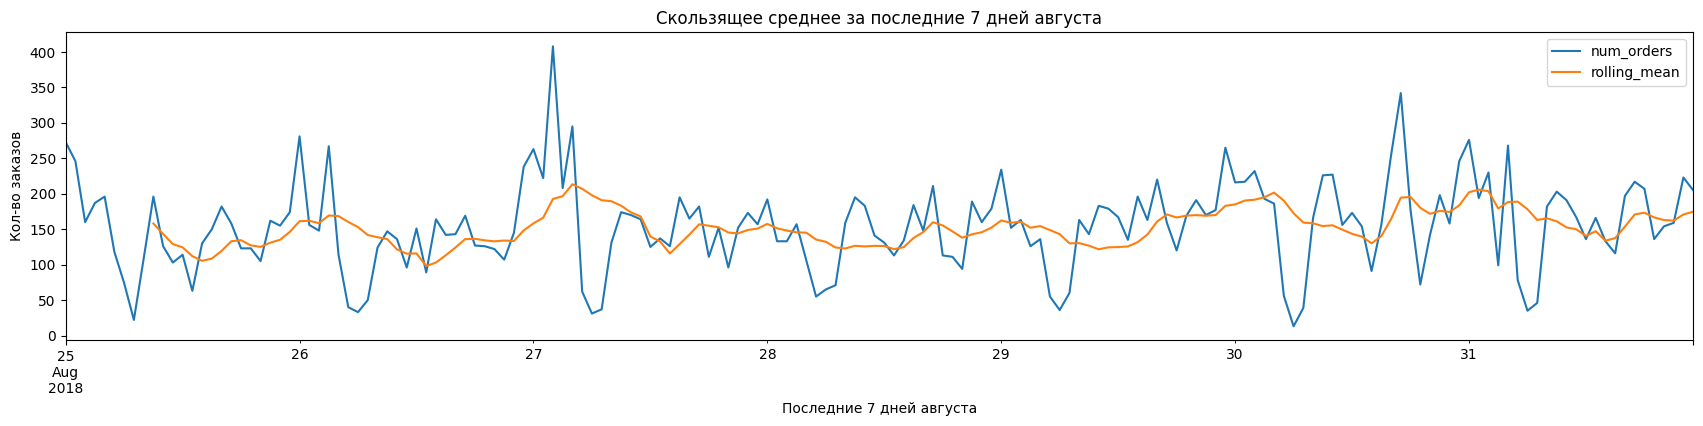

In [ ]:
taxi_aug_7days['rolling_mean'] = taxi_aug_7days.rolling(10).mean()
taxi_aug_7days.plot(figsize=figsize)
plt.title('Скользящее среднее за последние 7 дней августа')
plt.xlabel('Последние 7 дней августа')
plt.ylabel('Кол-во заказов')
plt.show()

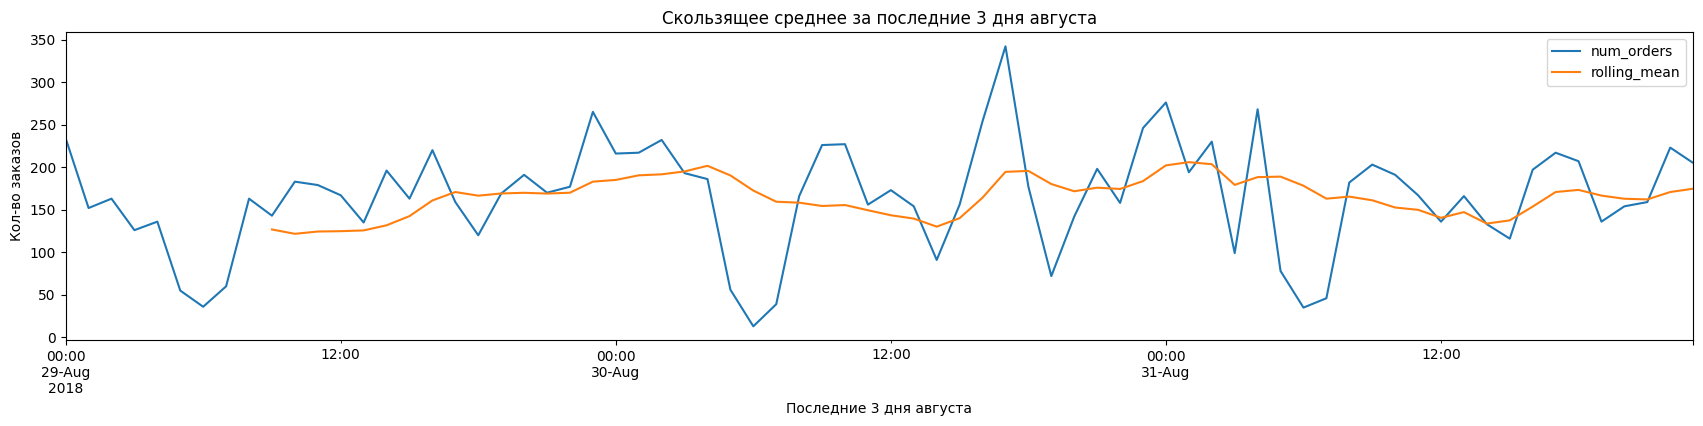

In [ ]:
taxi_aug_3days['rolling_mean'] = taxi_aug_3days.rolling(10).mean()
taxi_aug_3days.plot(figsize=figsize)
plt.title('Скользящее среднее за последние 3 дня августа')
plt.xlabel('Последние 3 дня августа')
plt.ylabel('Кол-во заказов')
plt.show()

### Декомпозиция

In [ ]:
#декомпозирую данные:
decomposed = seasonal_decompose(taxi.num_orders)
decomposed_aug = seasonal_decompose(taxi_aug.num_orders)
decomposed_aug_3days = seasonal_decompose(taxi_aug_3days.num_orders)

**Тренды за весь период, за последний месяц и последние 3 дня**

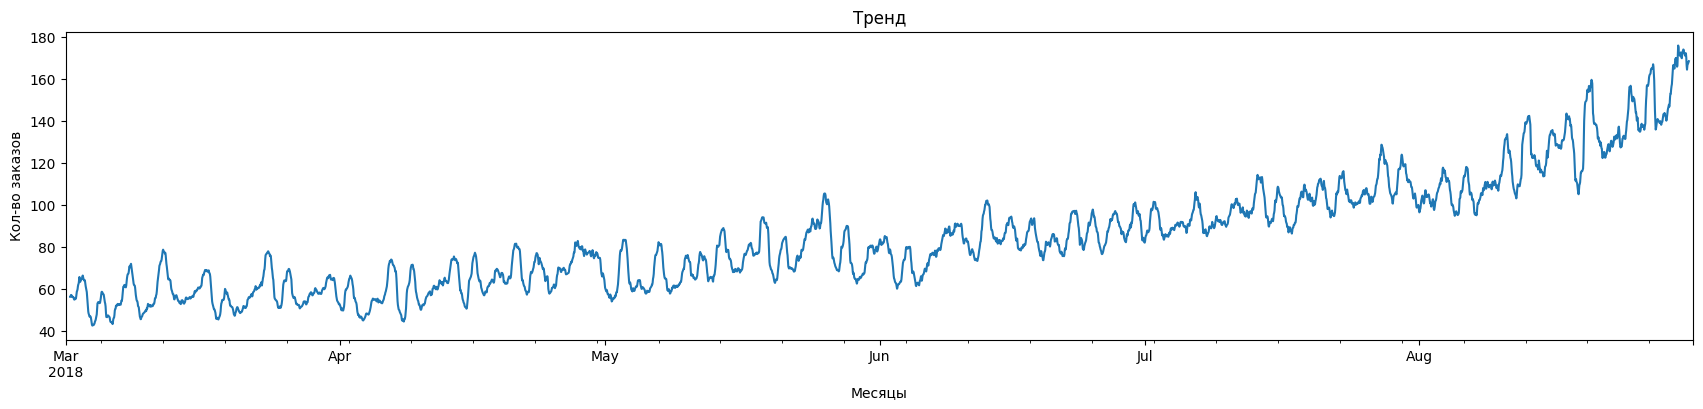

In [ ]:
decomposed.trend.plot(figsize=figsize)
plt.title('Тренд')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

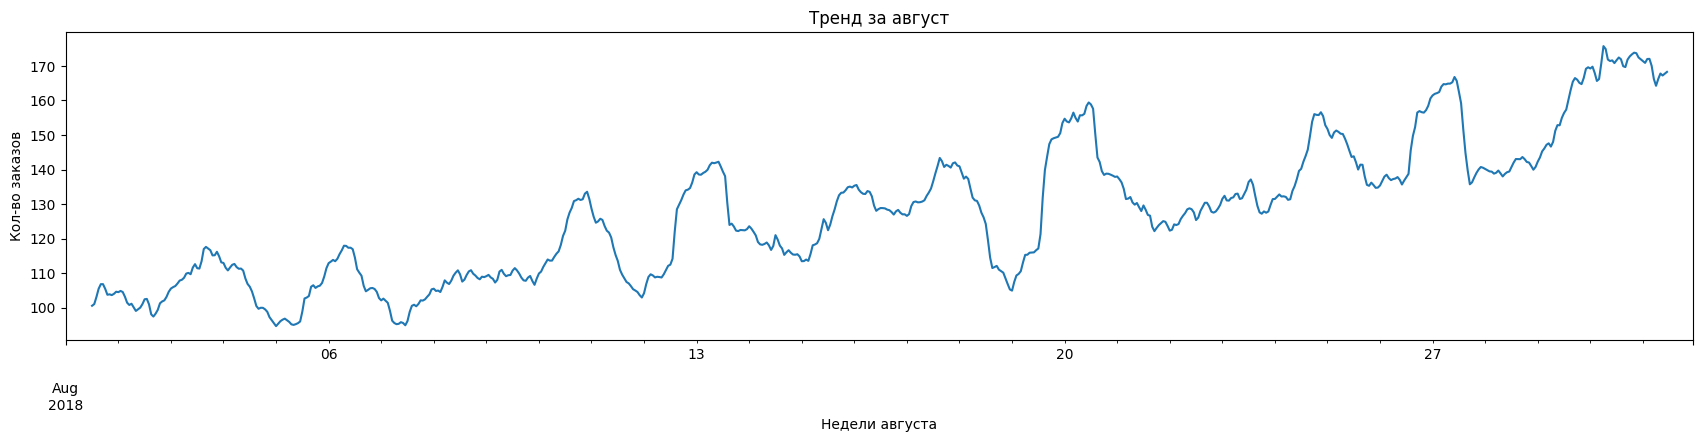

In [ ]:
decomposed_aug.trend.plot(figsize=figsize)
plt.title('Тренд за август')
plt.xlabel('Недели августа')
plt.ylabel('Кол-во заказов')
plt.show()

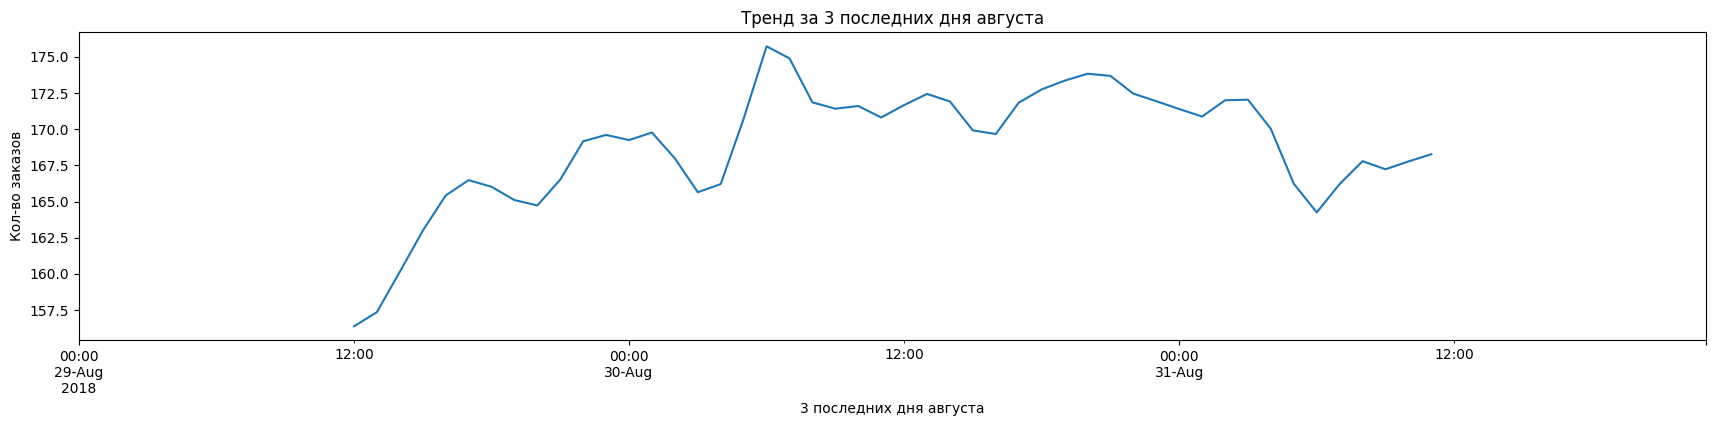

In [ ]:
decomposed_aug_3days.trend.plot(figsize=figsize)
plt.title('Тренд за 3 последних дня августа')
plt.xlabel('3 последних дня августа')
plt.ylabel('Кол-во заказов')
plt.show()

**Сезонность за весь период, за последний месяц и за последние 3 дня**

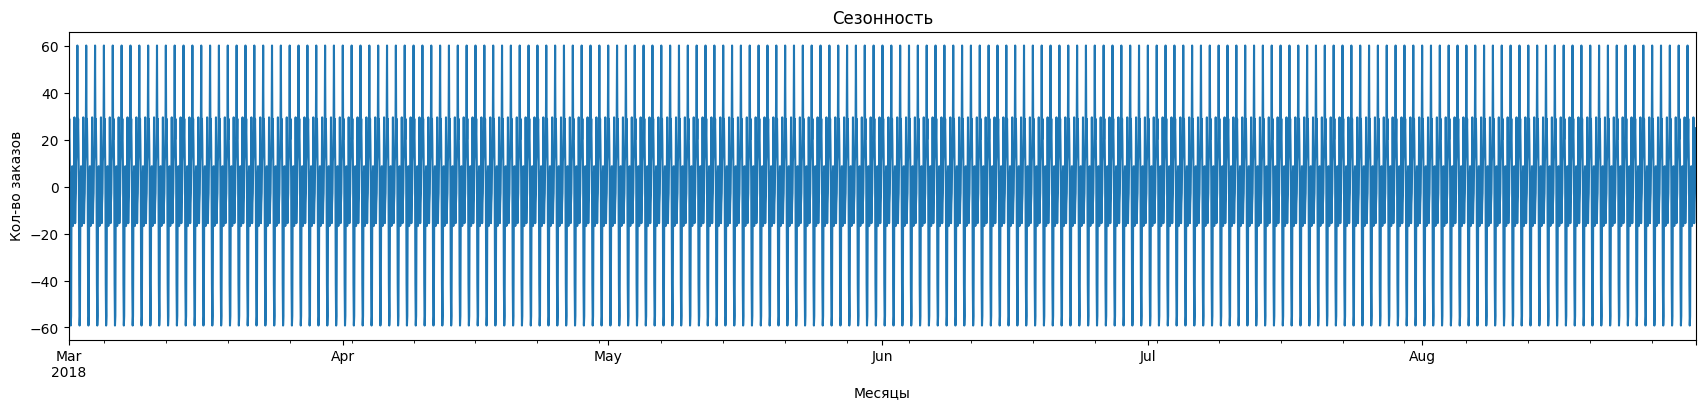

In [ ]:
decomposed.seasonal.plot(figsize=figsize)
plt.title('Сезонность')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

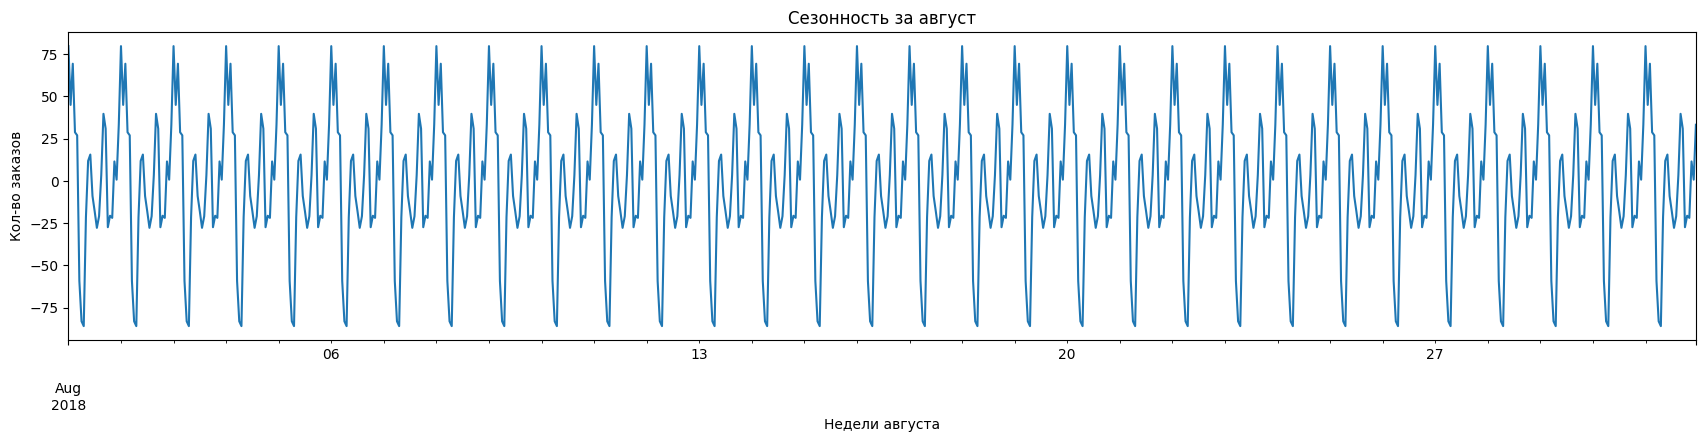

In [ ]:
decomposed_aug.seasonal.plot(figsize=figsize)
plt.title('Сезонность за август')
plt.xlabel('Недели августа')
plt.ylabel('Кол-во заказов')
plt.show()

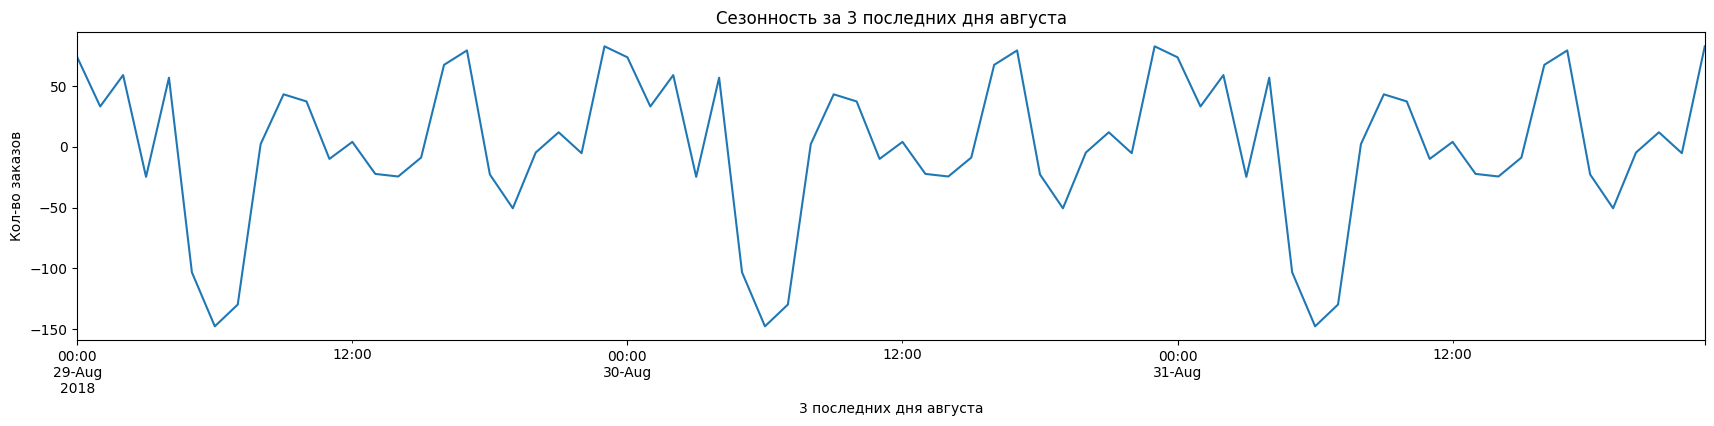

In [ ]:
decomposed_aug_3days.seasonal.plot(figsize=figsize)
plt.title('Сезонность за 3 последних дня августа')
plt.xlabel('3 последних дня августа')
plt.ylabel('Кол-во заказов')
plt.show()

Промежуточный вывод: сезонность явно сутки, так как на графике за 3 дня видно, что на всех 3 днях:

- падение заказов и минимум в районе 06:00 и 18:00
- рост заказов и максимум в районе 09:00 и 00:00

**Остатки за весь период, за последний месяц и за посление 3 дня**

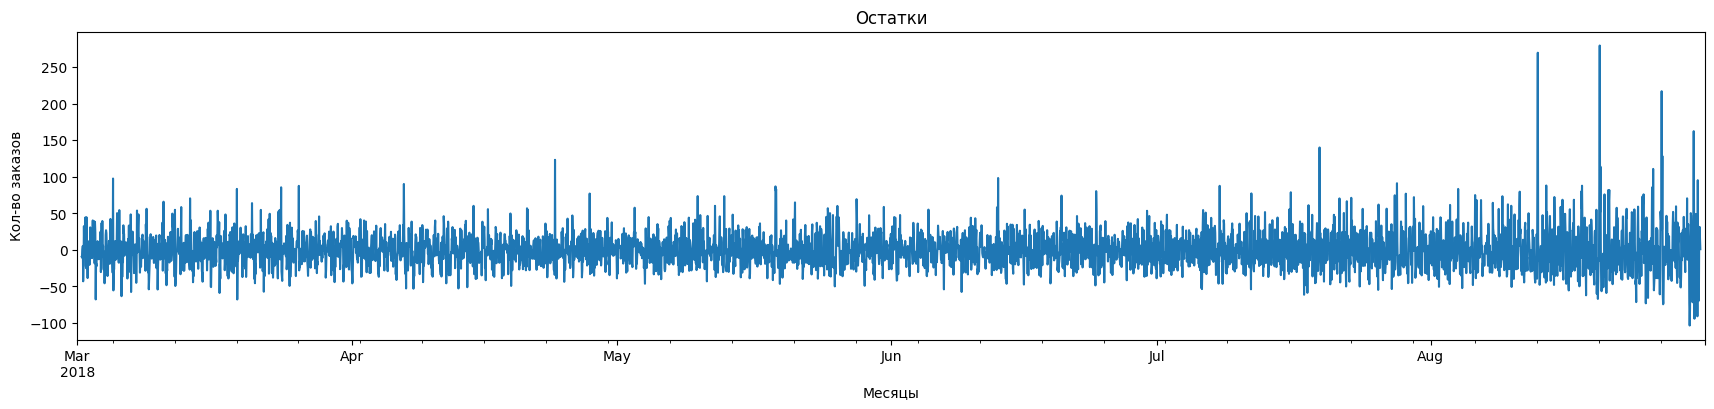

In [ ]:
decomposed.resid.plot(figsize=figsize)
plt.title('Остатки')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во заказов')
plt.show()

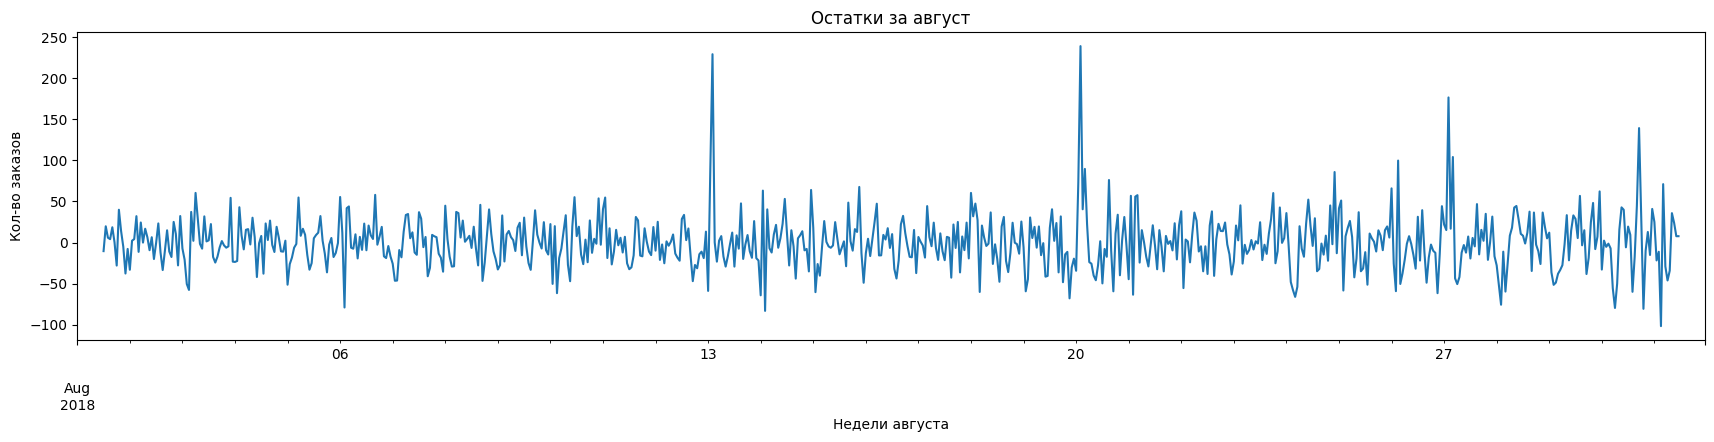

In [ ]:
decomposed_aug.resid.plot(figsize=figsize)
plt.title('Остатки за август')
plt.xlabel('Недели августа')
plt.ylabel('Кол-во заказов')
plt.show()

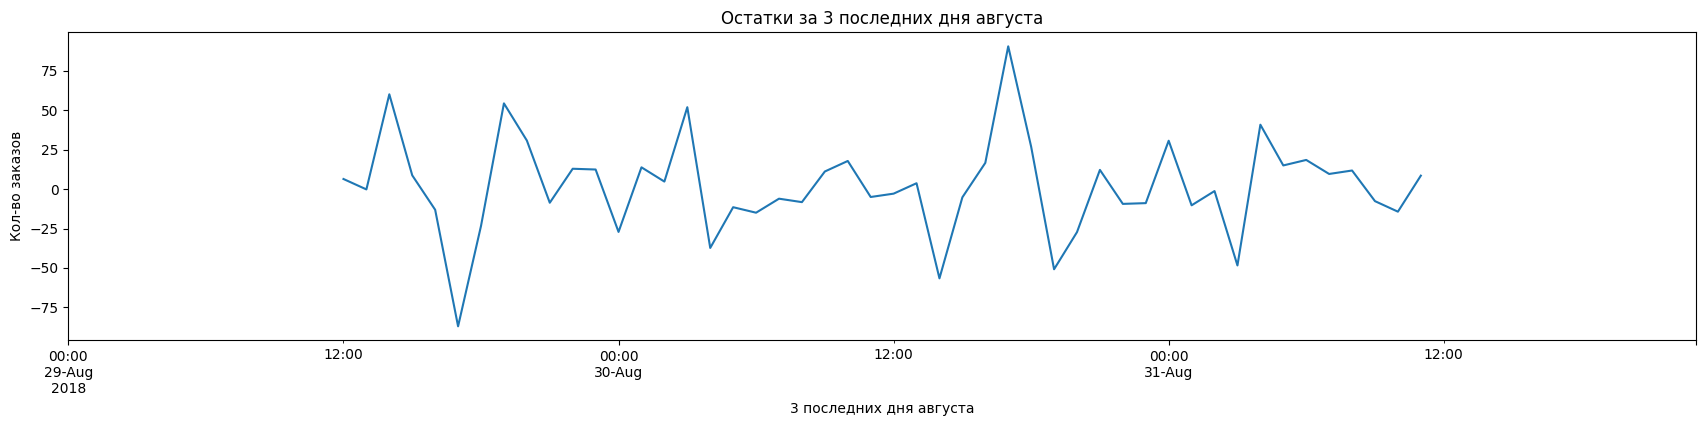

In [ ]:
decomposed_aug_3days.resid.plot(figsize=figsize)
plt.title('Остатки за 3 последних дня августа')
plt.xlabel('3 последних дня августа')
plt.ylabel('Кол-во заказов')
plt.show()

<div style="border:solid grey 2px; padding: 10px">  

**Вывод по п.2. Анализ данных:**

- Тренд идет на явное возрастание, то есть он не стационарный - это видно и на графике тренда, и на графике ресемплированных по 1 часу данных. Даже если убрать тренд и сезонность, то на графике остатков все равно видны всплески
- На графике ресемплированных по 1 часу данных видно, что кол-во заказов начинает возрастать, при этом в августе всплески заказов по понедельникам
- Видно падение заказов по утрам и затем подъем к 12:00
- Дисперсия увеличичвается
- Тренд в общем растет, то есть кол-во заказов и пользователей растет
- Видно что в раннее утро кол-во заказов резко падает
- Временной ряд в не является стационарным, так как подвержен тренду, который меняется во времени
- Есть явная суточная сезонность

## Обучение моделей

In [ ]:
# Создадим признаки для обучения модели
max_lag = 24
rolling_mean_size = 48
def make_features(data, column, max_lag, rolling_mean_size):
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek

    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data[column].shift(lag)

    data['rolling_mean'] = data[column].shift().rolling(rolling_mean_size).mean()

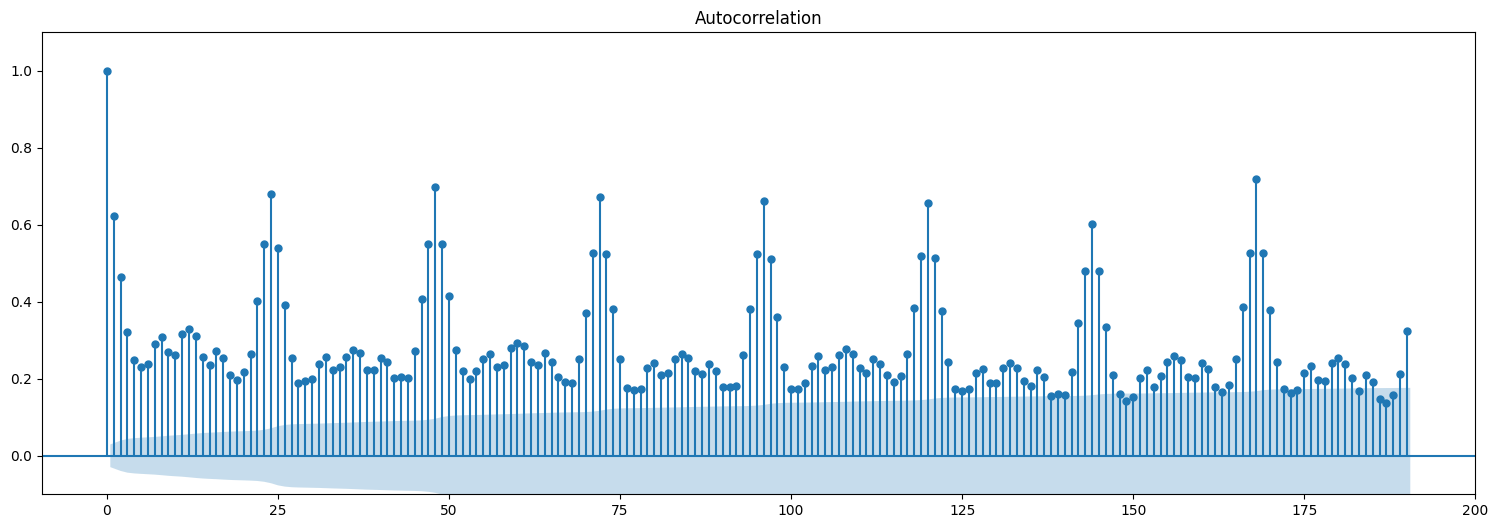

In [ ]:
# Код ревьюера
from statsmodels.graphics import tsaplots

taxi = pd.read_csv("datasets/taxi.csv", index_col=[0], parse_dates=[0]).resample('1H').sum()
ts = taxi['num_orders']

fig = tsaplots.plot_acf(ts,lags= 190)
fig.set_size_inches(18.5, 6)
plt.ylim(-.1, 1.1)
plt.show()

In [ ]:
taxi_copy = taxi.copy()

make_features(taxi,'num_orders', max_lag, rolling_mean_size)

train, test = train_test_split(taxi, shuffle=False, test_size=0.1, random_state=1515)
train = train.dropna()

features_train = train.drop('num_orders', axis=1)
target_train = train['num_orders']
features_test = test.drop('num_orders', axis=1)
target_test = test['num_orders']

### Линейная регрессия

In [ ]:
%%time
tscv = TimeSeriesSplit(n_splits=8)
regressor = LinearRegression()
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR = (cross_val_score(regressor,
                             features_train,
                             target_train,
                             cv=tscv,
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5
print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 27.146562377544374
CPU times: user 117 ms, sys: 77.9 ms, total: 195 ms
Wall time: 142 ms


In [ ]:
%%time

# С масштабированием
regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('# Train for root_mean_squared_error')
print()
cv_RMSE_LR_S = (cross_val_score(pipeline,
                                features_train,
                                target_train,
                                cv=tscv,
                                scoring='neg_mean_squared_error').mean() * -1) ** 0.5


print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LR_S)

# Train for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 27.146562377544374
CPU times: user 192 ms, sys: 169 ms, total: 361 ms
Wall time: 306 ms


### DecisionTree регрессия

In [ ]:
%%time

regressor = DecisionTreeRegressor()
max_depth_list = [x for x in range(2, 15)]
hyperparams = [{'criterion':['squared_error'],
                'max_depth':max_depth_list,
                'random_state':[1515]}]

print('# Tuning hyper-parameters for root_mean_squared_error')
print()
#clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')
clf = GridSearchCV(regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))
print()

cv_RMSE_DTR = (max(means)*-1) ** 0.5
print (cv_RMSE_DTR)

# Tuning hyper-parameters for root_mean_squared_error

Best parameters set found on development set:

{'criterion': 'squared_error', 'max_depth': 5, 'random_state': 1515}

Grid scores on development set:

32.209525 for {'criterion': 'squared_error', 'max_depth': 2, 'random_state': 1515}
30.999441 for {'criterion': 'squared_error', 'max_depth': 3, 'random_state': 1515}
30.531591 for {'criterion': 'squared_error', 'max_depth': 4, 'random_state': 1515}
30.167176 for {'criterion': 'squared_error', 'max_depth': 5, 'random_state': 1515}
30.758046 for {'criterion': 'squared_error', 'max_depth': 6, 'random_state': 1515}
30.540089 for {'criterion': 'squared_error', 'max_depth': 7, 'random_state': 1515}
31.941850 for {'criterion': 'squared_error', 'max_depth': 8, 'random_state': 1515}
33.244058 for {'criterion': 'squared_error', 'max_depth': 9, 'random_state': 1515}
34.154941 for {'criterion': 'squared_error', 'max_depth': 10, 'random_state': 1515}
33.935409 for {'criterion': 'squared_error', 'm

### CatBoost регрессия

In [ ]:
%%time


regressor = CatBoostRegressor()
hyperparams = [{'learning_rate':[0.1, 0.2, 0.3],
                'random_state':[1515],
                'verbose':[False]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, cv=tscv, param_grid=hyperparams, scoring='neg_mean_squared_error')
clf.fit(features_train, target_train)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.6f for %r"% ((mean*-1)** 0.5, params))
print()

cv_RMSE_CBR_ordinal = (max(means)*-1) ** 0.5

# Tuning hyper-parameters

Best parameters set found on development set:

{'learning_rate': 0.1, 'random_state': 1515, 'verbose': False}

Grid scores on development set:

24.982103 for {'learning_rate': 0.1, 'random_state': 1515, 'verbose': False}
25.452655 for {'learning_rate': 0.2, 'random_state': 1515, 'verbose': False}
26.018059 for {'learning_rate': 0.3, 'random_state': 1515, 'verbose': False}

CPU times: user 3min 42s, sys: 9.58 s, total: 3min 52s
Wall time: 2min 29s


### LightGBMRegressor

In [ ]:
%%time

regressor = LGBMRegressor()
hyperparams = [{'learning_rate':[x/10 for x in range(1, 6)],
                'random_state':[1515]}]

print('# Tuning hyper-parameters for root_mean_squared_error')
print()
#clf = GridSearchCV(regressor, hyperparams, scoring='neg_mean_squared_error')


cv_RMSE_LGBMR = (cross_val_score(regressor,
                             features_train,
                             target_train,
                             cv=tscv,
                             scoring='neg_mean_squared_error').mean() * -1) ** 0.5

print('Mean RMSE from CV of LinearRegression =', cv_RMSE_LGBMR)

# Tuning hyper-parameters for root_mean_squared_error

Mean RMSE from CV of LinearRegression = 25.60096985612615
CPU times: user 4.66 s, sys: 47 ms, total: 4.71 s
Wall time: 3.44 s


### Вывод
Было использовано 4 регрессионных моделей. Зафиксированы лучшие гиперпараметры и время их выполнения. Catboost показал лучшие результаты

## Тестирование моделей

### Линейная регрессия

CPU times: user 50.9 ms, sys: 29.1 ms, total: 80 ms
Wall time: 46.9 ms


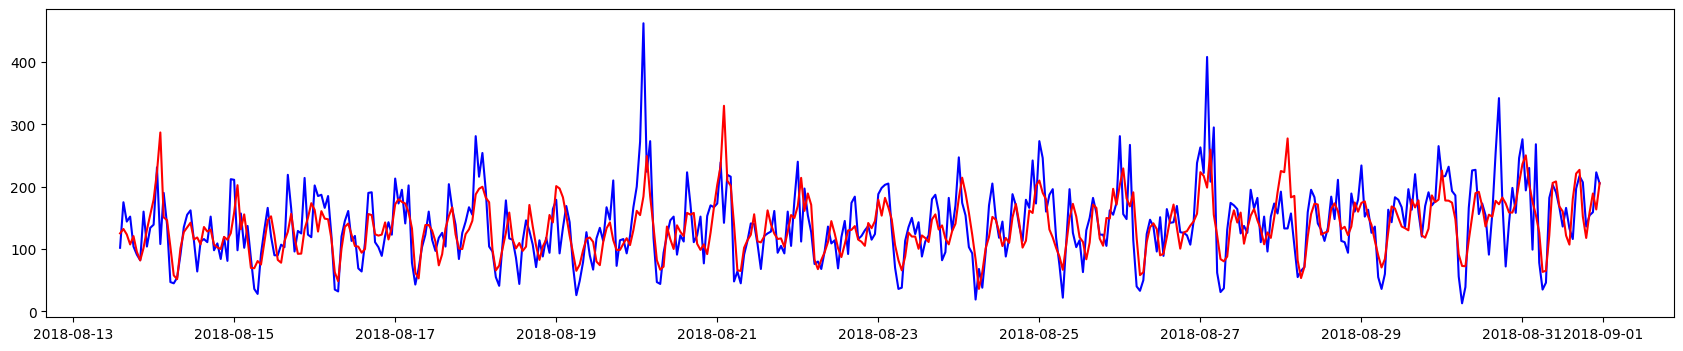

In [ ]:
%%time

model = LinearRegression()
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
final_RMSE_LR = mean_squared_error(target_test, target_predict) ** 0.5

plt.figure(figsize=figsize)
plt.plot(target_test.index,
         target_test,
         'b-',
         target_test.index,
         target_predict,
         'r-')

### DecisionTree регрессия

CPU times: user 61.3 ms, sys: 1.98 ms, total: 63.3 ms
Wall time: 67.6 ms


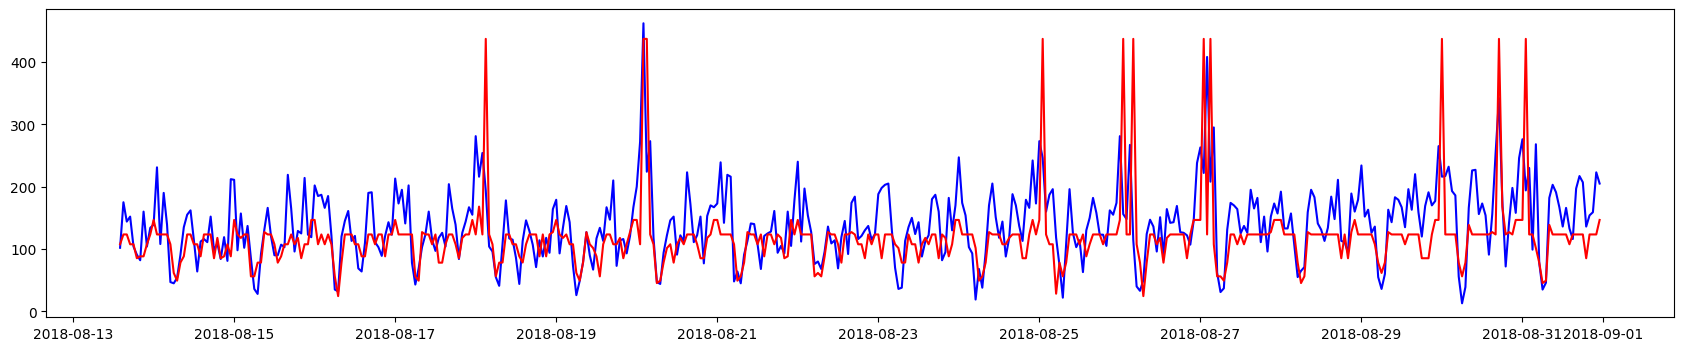

In [ ]:
%%time

model = DecisionTreeRegressor(criterion='squared_error',
                              max_depth=5,
                              random_state=1515)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
final_RMSE_DTR = mean_squared_error(target_test, target_predict) ** 0.5

plt.figure(figsize=figsize)
plt.plot(target_test.index,
         target_test,
         'b-',
         target_test.index,
         target_predict,
         'r-')

### CatBoost регрессия

CPU times: user 11.8 s, sys: 498 ms, total: 12.3 s
Wall time: 7.76 s


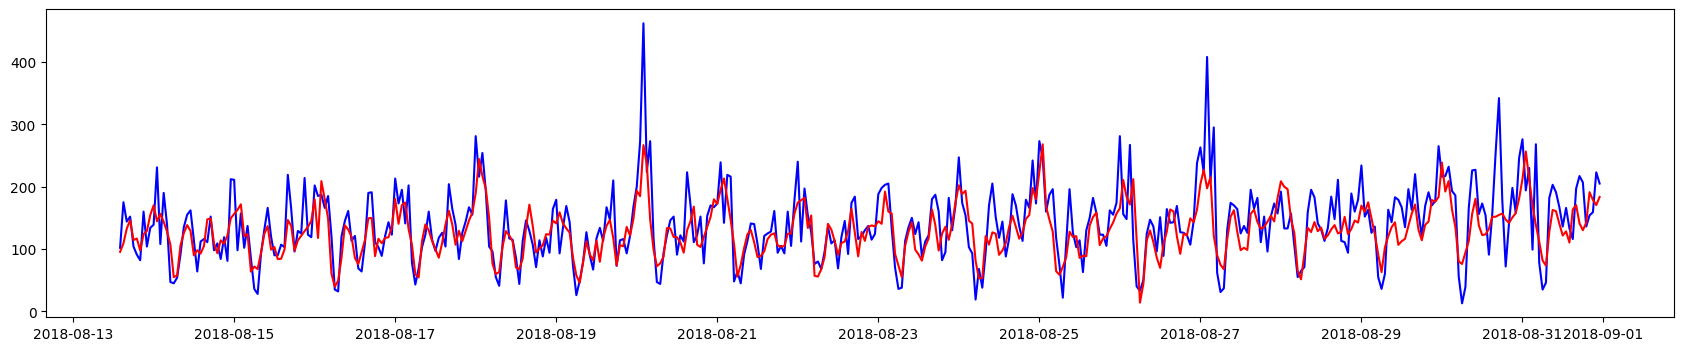

In [ ]:
%%time

model = CatBoostRegressor(learning_rate=0.1,
                          random_state=1515,
                          verbose=False)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
final_RMSE_CBR = mean_squared_error(target_test, target_predict) ** 0.5

plt.figure(figsize=figsize)
plt.plot(target_test.index,
         target_test,
         'b-',
         target_test.index,
         target_predict,
         'r-')

CPU times: user 5.86 s, sys: 168 ms, total: 6.02 s
Wall time: 3.24 s


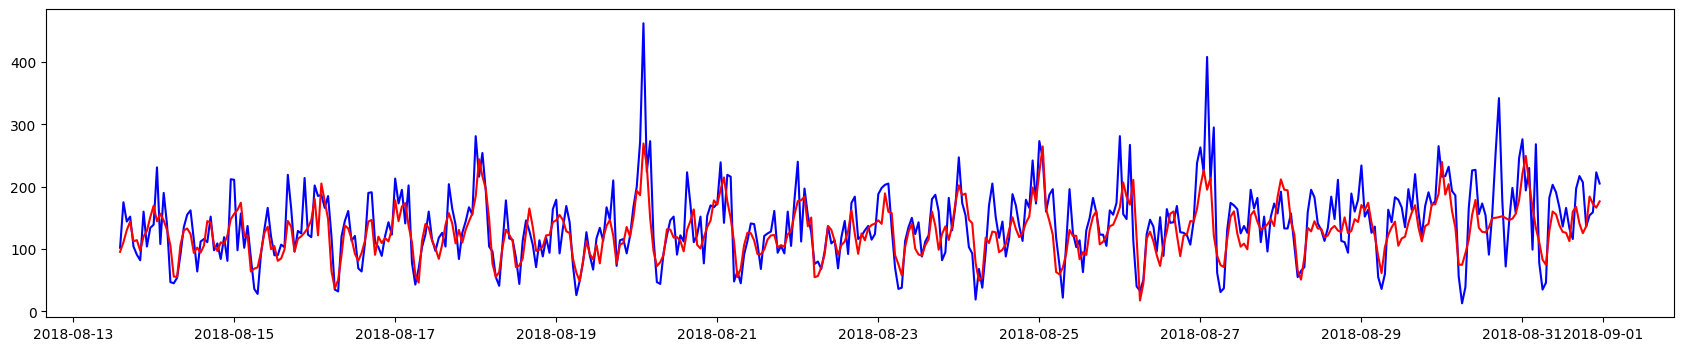

In [ ]:
%%time

model = CatBoostRegressor(learning_rate=0.1,
                          iterations = 500,
                          random_state=1515,
                          verbose=False)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
final_RMSE_CBR_original = mean_squared_error(target_test, target_predict) ** 0.5
plt.figure(figsize=figsize)
plt.plot(target_test.index,
         target_test,
         'b-',
         target_test.index,
         target_predict,
         'r-')

### LGBM регрессия

CPU times: user 1.85 s, sys: 30.3 ms, total: 1.88 s
Wall time: 991 ms


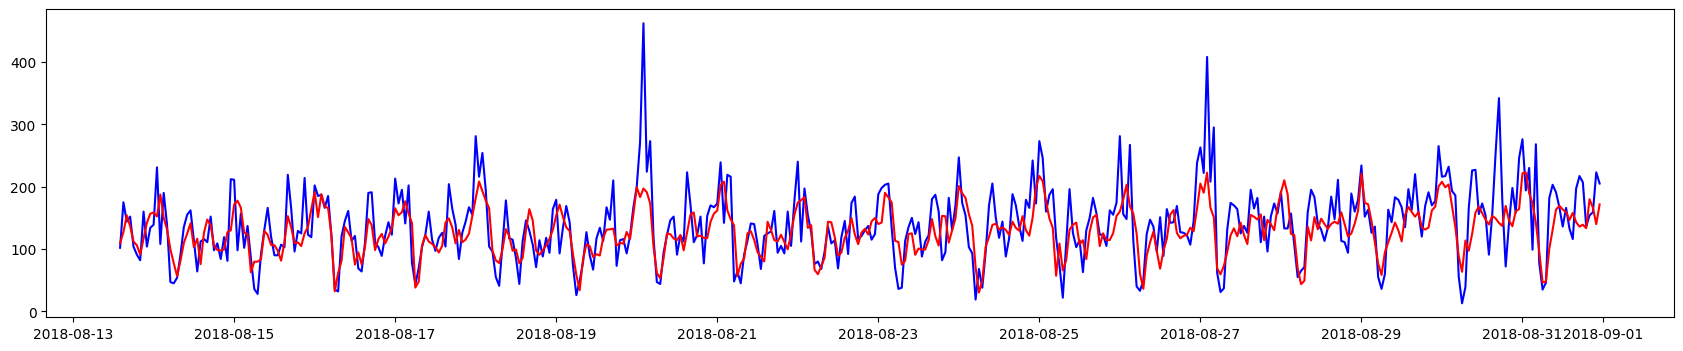

In [ ]:
%%time

model = LGBMRegressor(learning_rate=0.1,
                      num_leaves=500,
                      random_state=1515)
model.fit(features_train, target_train)
target_predict = model.predict(features_test)
final_RMSE_LGBMR = mean_squared_error(target_test, target_predict) ** 0.5

plt.figure(figsize=figsize)
plt.plot(target_test.index,
         target_test,
         'b-',
         target_test.index,
         target_predict,
         'r-')

# Итог

In [ ]:
index = ['LinearRegression',
         'DecisionTreeRegressor',
         'CatBoostRegressor',
         'LGBMRegressor']
data = {'RMSE на CV':[cv_RMSE_LR,
                      cv_RMSE_DTR,
                      cv_RMSE_CBR_ordinal,
                      cv_RMSE_LGBMR],
        'RMSE модели на тестовой выборке':[final_RMSE_LR,
                                           final_RMSE_DTR,
                                           final_RMSE_CBR,
                                           final_RMSE_LGBMR]}

scores_data = pd.DataFrame(data=data, index=index)
scores_data['Рейтинг RMSE на CV'] = (scores_data['RMSE на CV'].min() /
                              scores_data['RMSE на CV'])
scores_data['Выполнение задачи'] = scores_data['RMSE модели на тестовой выборке'] < 48.0
scores_data

,RMSE на CV,RMSE модели на тестовой выборке,Рейтинг RMSE на CV,Выполнение задачи
LinearRegression,27.146562,44.893327,0.920268,True
DecisionTreeRegressor,30.167176,62.486632,0.828122,False
CatBoostRegressor,24.982103,41.106134,1.000000,True
LGBMRegressor,25.600970,43.400302,0.975826,True


<div style="border:2px solid Black; padding:20px;">
<h1>Вывод</h1>

При lag = 24 и rolling_mean= 48

Все модели (кроме DTR) выполнели главное условие задачи, а имеенно значение метрики RMSE на тестовой выборке должно быть не больше 48.
</div>